# SD204 - TP2 : Linear regression
## REMI JAYLET

### Imports

In [37]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
data = np.loadtxt('Motorcycledata.txt')[:,1:]

### Question 1 - Données

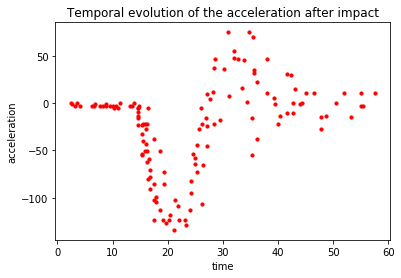

In [12]:
plt.scatter(data[:,0], data[:,1], s = 10, c = 'red')
plt.title('Temporal evolution of the acceleration after impact')
plt.ylabel('acceleration')
plt.xlabel('time')
plt.show()

Certain values have two mesures (coming from different captors). We shall take the mean of these 2 points for the rest of the TP.

In [15]:
# A MODIF !

data_temp= []
D = []

t_temp = 0
moy = 0
n = 1

for t,v in data:
    if (t == t_temp):
        moy += v
        n += 1
    else:
        D.append(n)
        data_temp.append(list((t_temp, moy/n)))
        moy = v
        n = 1
        t_temp = t
        
D.append(n)
D.pop(0)
data_temp.append(list((t_temp, moy/n)))
data_temp.pop(0)

[0, 0.0]

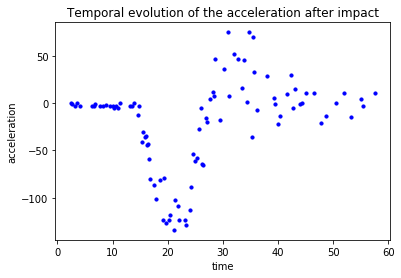

In [16]:
data = np.array(data_temp)
plt.scatter(data[:,0], data[:,1], s = 10, c = 'blue')
plt.title('Temporal evolution of the acceleration after impact')
plt.ylabel('acceleration')
plt.xlabel('time')
plt.show()

### Question 2 - Analyse exploratoire preliminaire

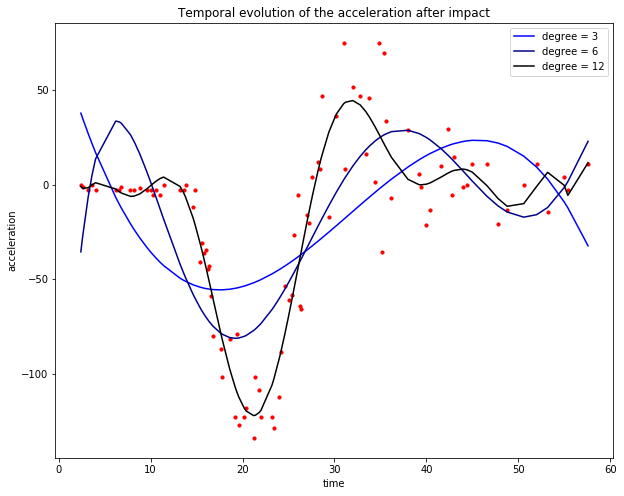

deg 3 R2 =  0.3398552389183449
deg 6 R2 =  0.6022007728062431
deg 12 R2 =  0.8705452686579961


In [48]:
mymodel3 = np.poly1d(np.polyfit(data[:,0], data[:,1], 3))
mymodel6 = np.poly1d(np.polyfit(data[:,0], data[:,1], 6))
mymodel9 = np.poly1d(np.polyfit(data[:,0], data[:,1], 9))
mymodel12 = np.poly1d(np.polyfit(data[:,0], data[:,1], 12))

plt.figure(num=None, figsize=(10, 8))
plt.scatter(data[:,0], data[:,1], s = 10, c = 'red')
plt.plot(data[:,0], mymodel3(data[:,0]), color = 'blue', label = 'degree = 3')
plt.plot(data[:,0], mymodel6(data[:,0]), color = 'darkblue', label = 'degree = 6')
plt.plot(data[:,0], mymodel12(data[:,0]), color = 'black', label = 'degree = 12')
plt.title('Temporal evolution of the acceleration after impact')
plt.ylabel('acceleration')
plt.xlabel('time')
plt.legend()
plt.show()

print("deg 3 R2 = ", r2_score(data[:,1], mymodel3(data[:,0])))
print("deg 6 R2 = ", r2_score(data[:,1], mymodel6(data[:,0])))
print("deg 12 R2 = ", r2_score(data[:,1], mymodel12(data[:,0])))

There is no significant improvement in R2 after deg 12.

### Question 3 - Regression par splines